In [1]:
import pandas as pd # to dataframes
import matplotlib.pyplot as plt #to define plot parameters
import seaborn as sns #to graphical plots
import numpy as np #to math 

plt.style.use('ggplot') # to plot graphs with gggplot2 style

# To NLP and Word Cloud
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [2]:
strains = pd.read_csv("cannabis.csv")

In [3]:
# Veryfing the shape, if have any null numbers and looking how the data is
print(strains.shape)
print(strains.isnull().sum())
print(strains.info())
strains.head(n=6)

(2351, 6)
Strain           0
Type             0
Rating           0
Effects         87
Flavor         156
Description     37
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2264 non-null   object 
 4   Flavor       2195 non-null   object 
 5   Description  2314 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB
None


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
5,3-Bears-Og,indica,0.0,NaN,NaN,3 Bears OG by Mephisto Genetics is an autoflow...


In [4]:
strains['Type'] = strains.Type.astype(str)
#Here looking though the data to see the structure
print(strains.nunique())

Strain         2350
Type              3
Rating           26
Effects        1654
Flavor         1292
Description    2311
dtype: int64


/var/folders/v2/3pv6lmds4n36q6fqkyylsfq40000gn/T/ipykernel_24225/3237157597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x="Type", data=strains,


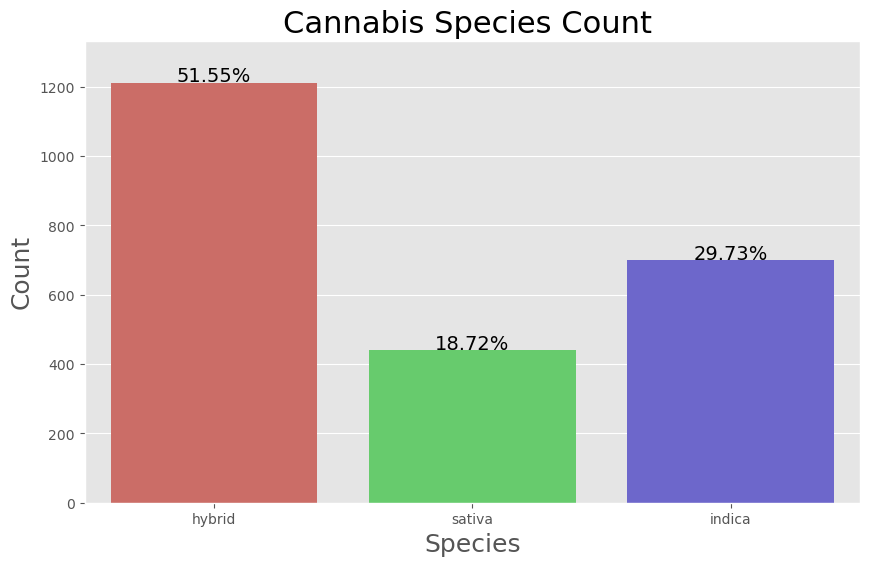

In [5]:
#First, I will look the distribuition of Types
total = len(strains)
plt.figure(figsize=(10,6))

g = sns.countplot(x="Type", data=strains, 
                  palette='hls', color='blue')
g.set_title("Cannabis Species Count ", fontsize=22)
g.set_xlabel('Species', fontsize=18)
g.set_ylabel('Count', fontsize=18)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

/var/folders/v2/3pv6lmds4n36q6fqkyylsfq40000gn/T/ipykernel_24225/110285872.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(strains["Rating"],


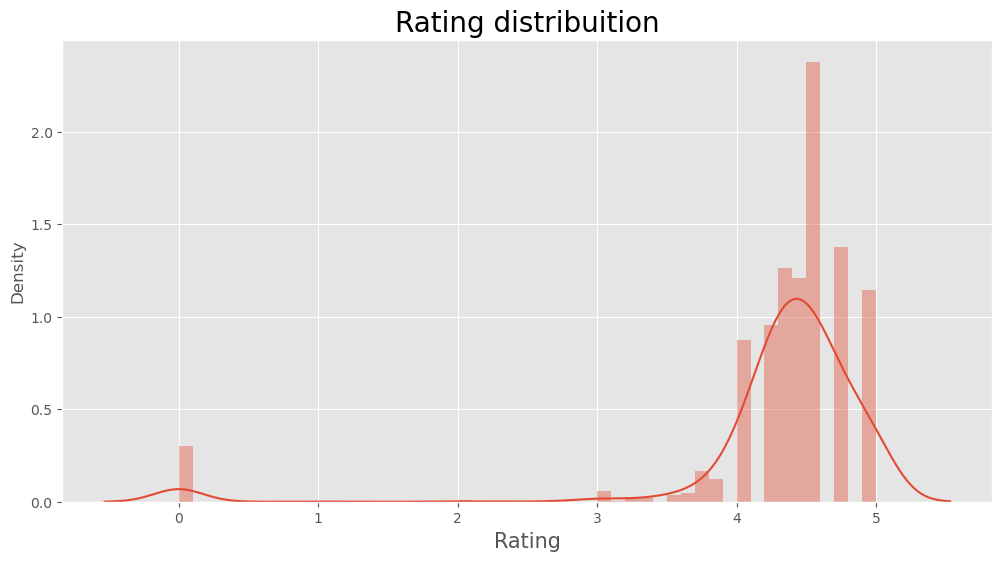

In [6]:
plt.figure(figsize=(12,6))

#Total rating distribuition
g = sns.distplot(strains["Rating"],
                 bins=50)
g.set_title("Rating distribuition", 
            size = 20)
g.set_xlabel('Rating',
             fontsize=15)

plt.show()

In [7]:
print("Rating Distribuition by Species Type")
pd.crosstab(strains[strains.Rating > 3.0]['Rating'], strains.Type).T

Rating Distribuition by Species Type


Rating,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Type,,,,,,,,,,,,,,,,,,,,
hybrid,1,1,2,2,5,6,7,9,9,62,56,113,150,144,164,114,95,88,31,102
indica,0,2,0,1,2,4,5,10,12,24,33,64,89,83,94,78,47,41,19,70
sativa,0,0,1,2,2,1,4,4,8,18,12,48,58,57,59,50,22,30,9,38


/var/folders/v2/3pv6lmds4n36q6fqkyylsfq40000gn/T/ipykernel_24225/3900547917.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(strains[(strains.Type == 'hybrid') &
/var/folders/v2/3pv6lmds4n36q6fqkyylsfq40000gn/T/ipykernel_24225/3900547917.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.di

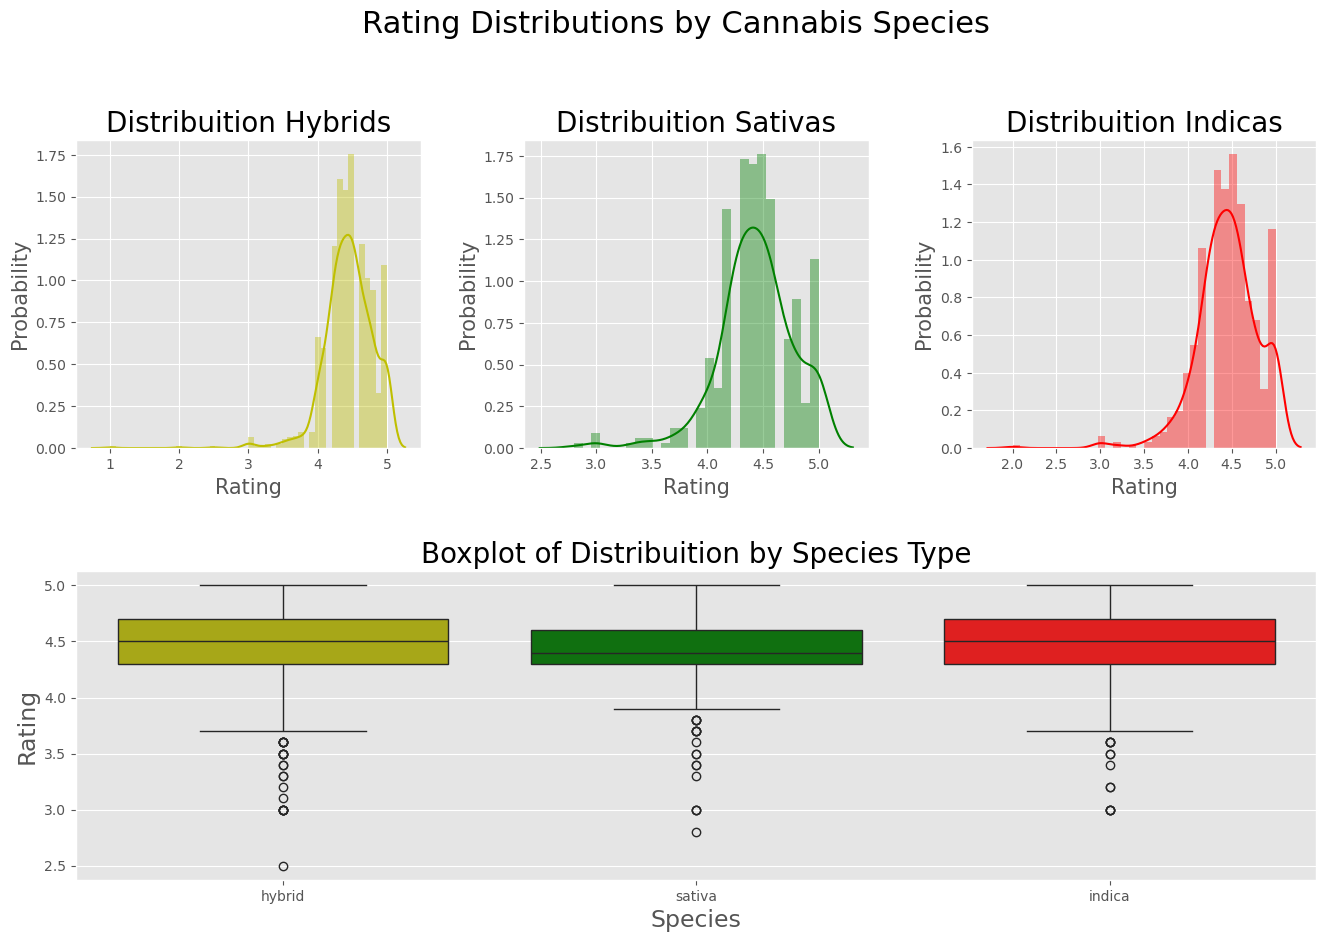

In [8]:
plt.figure(figsize=(16,10))

plt.suptitle('Rating Distributions by Cannabis Species', fontsize=22)

#Let's look the Rating distribuition by Type.
g = plt.subplot(231)
g = sns.distplot(strains[(strains.Type == 'hybrid') & 
                               (strains.Rating > 0)]["Rating"],
                 color='y')
g.set_xlabel("Rating", fontsize=15)
g.set_ylabel("Probability", fontsize=15)
g.set_title("Distribuition Hybrids", fontsize=20)

g1 = plt.subplot(232)
g1 = sns.distplot(strains[(strains.Type == 'sativa') & 
                               (strains.Rating > 0)]["Rating"],
                  color='g')
g1.set_xlabel("Rating", fontsize=15)
g1.set_ylabel("Probability", fontsize=15)
g1.set_title("Distribuition Sativas",
             fontsize=20)

g2 = plt.subplot(233)
g2 = sns.distplot(strains[(strains.Type == 'indica') & 
                               (strains.Rating > 0)]["Rating"], color='r')
g2.set_xlabel("Rating", fontsize=15)
g2.set_ylabel("Probability", fontsize=15)
g2.set_title("Distribuition Indicas", 
             fontsize=20)
g3 = plt.subplot(212)

my_pal = {"hybrid": "y", "sativa": "g", "indica":"r"}

#I will now explore the Rating distribuition by Type
g3 = sns.boxplot(x="Type",y="Rating",  palette=my_pal,
                data=strains[strains["Rating"] > 2])
g3.set_title("Boxplot of Distribuition by Species Type", 
            fontsize=20)
g3.set_xlabel("Species", fontsize=17)
g3.set_ylabel("Rating", fontsize=17)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.85)

plt.show()
